**Making Dataset**

In [145]:
import pandas as pd
data={
    'Name': ['Alice', 'Bob', 'Chaile', 'David'],
    'Age':[25,30,35,40],
    'City':['ny', 'la', 'chicago', 'howton']
}

data=pd.DataFrame(data)
data

,Name,Age,City
0,Alice,25,ny
1,Bob,30,la
2,Chaile,35,chicago
3,David,40,howton


In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_samples=1000

data={
    'state': np.random.choice(['delhi', 'mumbay', 'haryana'], n_samples),
    'age': np.random.randint(18,65, n_samples),
    'edu lvl': np.random.choice(['+2', 'bachalore', 'master', 'phd' ], n_samples),
    'loan approved': np.random.choice([0,1], n_samples, p=[0.3, 0.7])
    }
data=pd.DataFrame(data)
data

,state,age,edu lvl,loan approved
0,haryana,20,bachalore,0
1,delhi,48,+2,0
2,haryana,57,phd,1
3,haryana,54,phd,1
4,delhi,53,+2,1
...,...,...,...,...
995,mumbay,24,master,1
996,mumbay,29,bachalore,1
997,haryana,47,phd,0
998,haryana,38,bachalore,0


In [146]:
des=data.describe()
des

,Age
count,4.000000
mean,32.500000
std,6.454972
min,25.000000
25%,28.750000
50%,32.500000
75%,36.250000
max,40.000000


**Load Dataset**

In [6]:
import pandas as pd
# Load the dataset
data = pd.read_csv('survey lung cancer.csv')

data.shape

(309, 16)

In [2]:
# Display number of rows and columns
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 309
Number of columns: 16


In [115]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [139]:
group=data.groupby('GENDER').mean()
group

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,,,,,,,,,,,,,,,
0,19.673469,0.544218,0.680272,0.578231,0.646259,0.612245,0.714286,0.47619,0.482993,0.319728,0.510204,0.673469,0.510204,0.367347,0.850340
1,19.919753,0.580247,0.469136,0.425926,0.370370,0.407407,0.635802,0.62963,0.623457,0.771605,0.641975,0.611111,0.432099,0.728395,0.895062


In [4]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
data=data.dropna()

**Label Encoding**

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
le = LabelEncoder()

#apply used to encode entire all the data in one step
data = data.apply(le.fit_transform)


In [117]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,31,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,16,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,20,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,20,0,1,0,0,0,0,0,1,0,1,1,0,0,0


**One Hot encoder another method to encode**

In [37]:
data=pd.get_dummies(data, columns=['GENDER'], dtype=int)

In [39]:
data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,1,0


**Checking data is balanced or not**

In [9]:
# Checking if the dataset is balanced
target_column = 'LUNG_CANCER'
target_counts = data[target_column].value_counts()
print(f'Target counts:\n{target_counts}')

Target counts:
LUNG_CANCER
1    270
0     39
Name: count, dtype: int64


In [10]:
from imblearn.over_sampling import SMOTE
# Checking balance
if target_counts.min() / target_counts.max() < 0.5:
    print("The dataset is not balanced. \nBalancing the dataset using SMOTE.")
    smote = SMOTE(random_state=42)
else:
    print("The dataset is balanced.")
    smote = None

The dataset is not balanced. 
Balancing the dataset using SMOTE.


**features and target**

In [11]:
X = data.drop(columns=[target_column])
y = data[target_column]

#or   X=data.iloc[:,:-1]
#     Y=data.iloc[:, -1]


#or   X= data[['column1', 'column2', 'column3'  just except last column ]]
#     Y= data['last column']

In [121]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,26,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,31,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,16,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,20,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,20,0,1,0,0,0,0,0,1,0,1,1,0,0


In [59]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

**Feature Scaling**

In [12]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Spliting the data**

In [13]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**If the dataset is not balanced, apply SMOTE to the training data**

In [124]:
if smote:
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("After balancing, the new target counts are:")
    print(pd.Series(y_train).value_counts())

After balancing, the new target counts are:
LUNG_CANCER
1    210
0    210
Name: count, dtype: int64


**Model Training**

**Linear Regression**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


R^2 Score: -0.6769102681520063
Mean Squared Error (MSE): 0.052348915759167725


**Multiple regression**

In [15]:
mr = LinearRegression()
mr.fit(X_train, y_train)
y_pred = mr.predict(X_test)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


R^2 Score: -0.6769102681520063
Mean Squared Error (MSE): 0.052348915759167725


**KNN**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


knn=accuracy_score(y_test, y_pred)
print("Accuracy:", knn)


Confusion Matrix:
 [[ 1  1]
 [ 3 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62

Accuracy: 0.9354838709677419


**SVM**

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



svm=accuracy_score(y_test, y_pred)
print("Accuracy:", svm)


Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Accuracy: 0.967741935483871


**Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



dt=accuracy_score(y_test, y_pred)
print("Accuracy:", dt)


Confusion Matrix:
 [[ 1  1]
 [ 2 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62

Accuracy: 0.9516129032258065


**Naive Bias**

In [19]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


naive=accuracy_score(y_test, y_pred)
print("Accuracy:", naive)


Confusion Matrix:
 [[ 1  1]
 [ 2 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62

Accuracy: 0.9516129032258065


**K-means clustering**

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(X_train)

# Predict cluster labels
y_pred = kmean.predict(X_test)

# Evaluation
print("Silhouette Score:", silhouette_score(X_test, y_pred))


Silhouette Score: 0.1003034505216659


**ANN**

In [21]:
from sklearn.neural_network import MLPClassifier

# Define and train the model
mlp = MLPClassifier(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


mlp=accuracy_score(y_test, y_pred)
print("Accuracy:", mlp)

Confusion Matrix:
 [[ 2  0]
 [ 3 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.95      0.97        60

    accuracy                           0.95        62
   macro avg       0.70      0.97      0.77        62
weighted avg       0.98      0.95      0.96        62

Accuracy: 0.9516129032258065


/home/love/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**Plot confusion matrix**

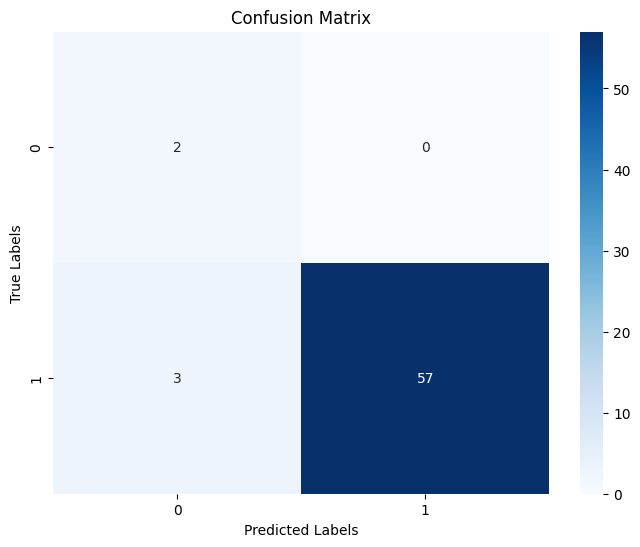

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**Compare the models accuracy**

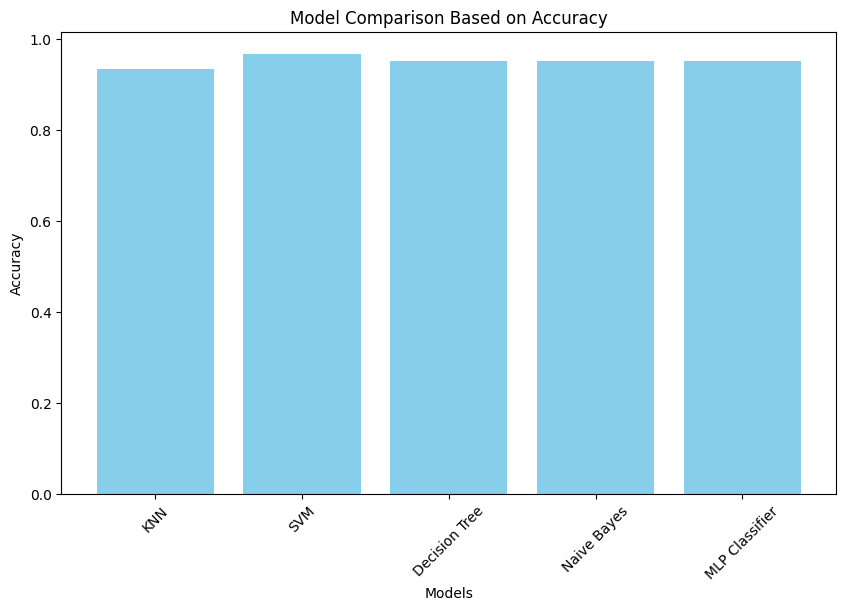

In [23]:
import matplotlib.pyplot as plt

# List of trained model names and their corresponding accuracies
model_names = ['KNN', 'SVM', 'Decision Tree', 'Naive Bayes', 'MLP Classifier']
accuracies = [knn, svm, dt, naive, mlp] 

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison Based on Accuracy')
plt.xticks(rotation=45)
plt.show()


**plot decision tree entropy**

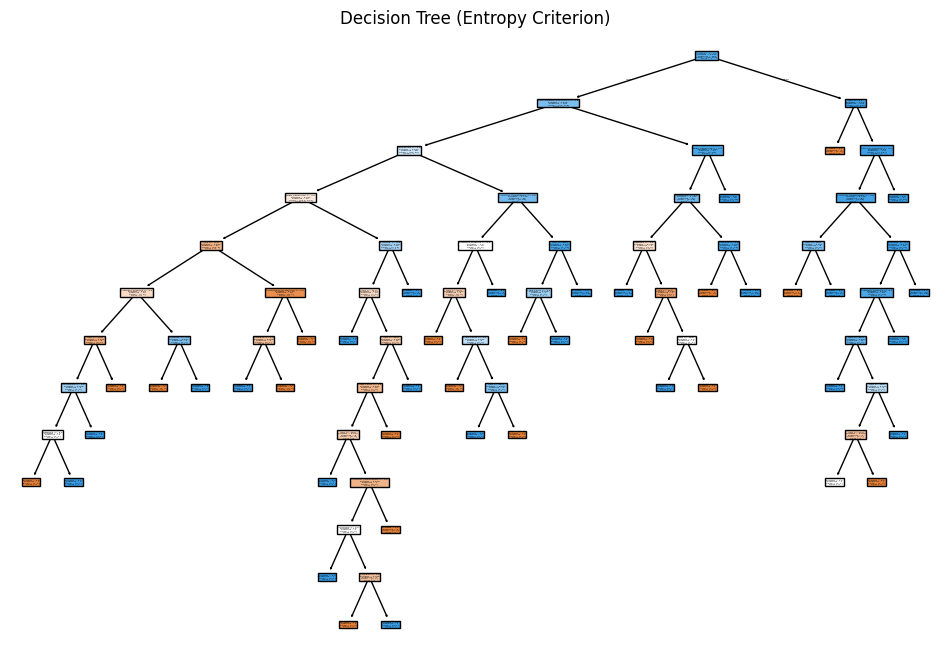

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Assuming 'data' is your DataFrame and 'target_column' is the column name you want to predict
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target variable

# Train the Decision Tree Classifier with entropy criterion
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X, y)  # Train the model

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree (Entropy Criterion)")
plt.show()


**X train and x test visualization knn**

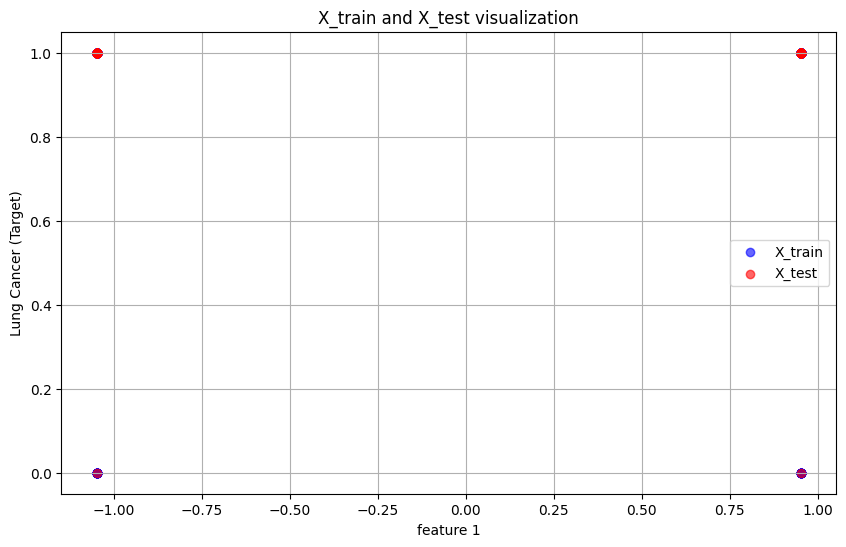

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Ensure y_train and y_test are NumPy arrays if they are Pandas Series
y_train_values = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_values = y_test.values if isinstance(y_test, pd.Series) else y_test

# Plot the data (first column of X_train, first column of y_train)
plt.scatter(X_train[:, 0], y_train_values, color='blue', label='X_train', alpha=0.6)

# Plot the data (first column of X_test, first column of y_test)
plt.scatter(X_test[:, 0], y_test_values, color='red', label='X_test', alpha=0.6)

plt.xlabel('feature 1')
plt.ylabel('Lung Cancer (Target)')
plt.title('X_train and X_test visualization')
plt.legend()
plt.grid(True)
plt.show()


**Regression Plot**

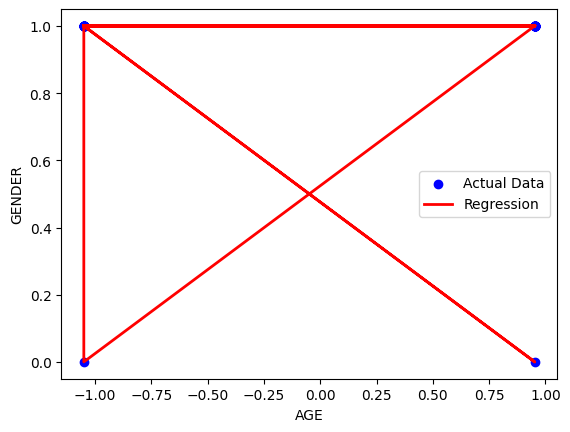

In [26]:
import matplotlib.pyplot as plt

# Ensure X_test is a 1D array (select one feature column if it's 2D)
X_test_feature = X_test[:, 0] if X_test.ndim > 1 else X_test

# Check if y_test is a pandas Series or a NumPy array
y_test_values = y_test.values if isinstance(y_test, pd.Series) else y_test

# Plot the data
plt.scatter(X_test_feature, y_test_values, color='blue', label="Actual Data")
plt.plot(X_test_feature, y_test_values, color='red', linewidth=2, label="Regression")

plt.xlabel("AGE")
plt.ylabel("GENDER")

plt.legend()
plt.show()


/home/love/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


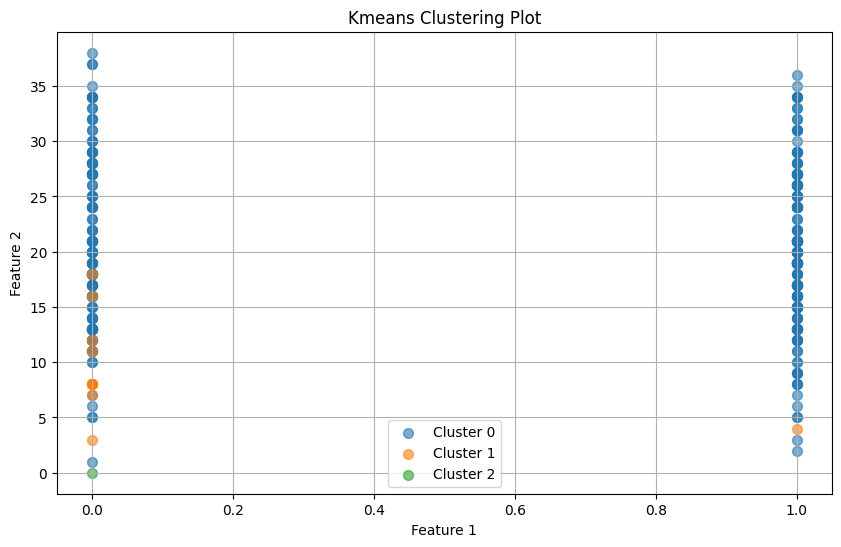

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get predicted cluster labels
y_pred = kmean.predict(X)

# Convert X to a NumPy array if it is a DataFrame
X_array = X.values if hasattr(X, "values") else X

# Plotting the clusters
plt.figure(figsize=(10, 6))

unique_labels = np.unique(y_pred)
for label in unique_labels:
    cluster_points = X_array[y_pred == label]  # Filter points for this cluster
    plt.scatter(
        cluster_points[:, 0],  # First feature
        cluster_points[:, 1],  # Second feature
        label=f"Cluster {label}",
        alpha=0.6,
        s=50,
    )

plt.title("Kmeans Clustering Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


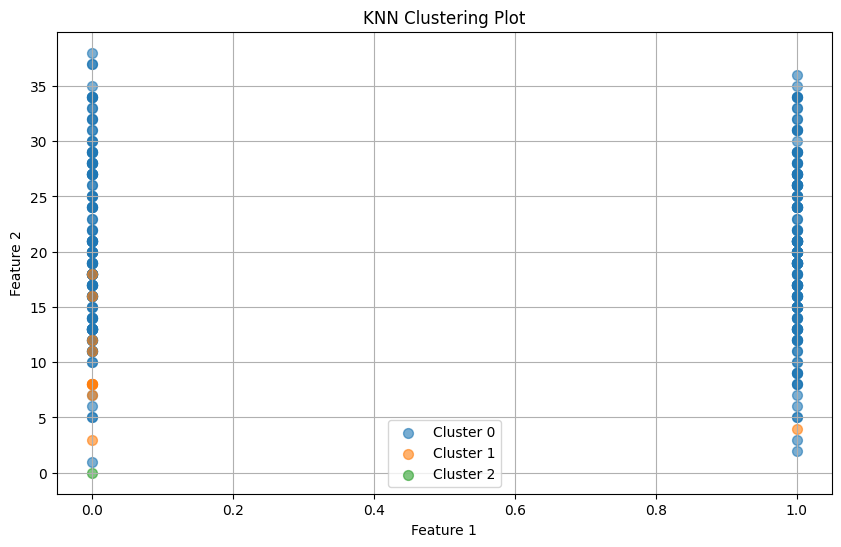

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure X is in array form
X_array = X.values if hasattr(X, "values") else X

# Get predicted cluster labels
y_pred = kmean.predict(X_array)

# Plotting the clusters
plt.figure(figsize=(10, 6))
unique_labels = np.unique(y_pred)
for label in unique_labels:
    cluster_points = X_array[y_pred == label]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f"Cluster {label}",
        alpha=0.6,
        s=50,
    )

plt.title("KNN Clustering Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()
